In [1]:
# enable automatic reloading of the notebook
%load_ext autoreload
%autoreload 2

In [2]:
import ast
import math
import pandas as pd

In [3]:
def literal_converter(val):
    try:
        return ast.literal_eval(val)
    except Exception:
        return val

In [14]:
df = pd.read_csv(
    "../data/final/multi/kobe_bryant__helicopter.csv",
    names=["id", "title", "body", "lang", "source", "dateTime", "url", "uri", "eventUri", "concepts", "clusterId", "namedEntities", "wikiConcepts"],
    dtype={
        "id": "Int64",
        "title": "str",
        "body": "str",
        "lang": "str",
        "source": "str",
        "dateTime": "str",
        "url": "str",
        "uri": "str",
        "eventUri": "str",
        "concepts": "string",
        "clusterId": "str",
        "namedEntities": "str",
        "wikiConcepts": "str",
    },
    parse_dates=["dateTime"],
    on_bad_lines="warn",
    engine="python",
    skiprows=1,
)
# reset the ID column
df = df.sort_values(by="dateTime")
df["id"] = [i for i in range(len(df))]

df["concepts"] = df["concepts"].apply(lambda x: literal_converter(x))
df["namedEntities"] = df["namedEntities"].apply(lambda x: literal_converter(x))

# rename the event registry ID
df["wn_id"] = df["clusterId"]

# drop unused IDs
df = df.drop(columns=["wikiConcepts", "namedEntities", "clusterId"])
df = df[df["title"].notna() & df["title"].notnull()]

df = df.where(df.notnull() & df.notna(), None)

In [15]:
df

,id,title,body,lang,source,dateTime,url,uri,eventUri,concepts,wn_id
0,0,Chol Marial's Long Journey to College Basketball,The Long Journey of Maryland 7-Footer Chol Mar...,eng,Sports Illustrated,2020-01-03 17:21:00,https://www.si.com/college/2020/01/03/chol-mar...,1397607188,eng-5399258,"[kobe_bryant, helicopter]",wn-1
1,1,"Kobe Bryant Dead at 41, Killed in Helicopter C...",0comments Retired Los Angeles Lakers star Kobe...,eng,Celebrity,2020-01-26 21:38:00,https://popculture.com/sports/2020/01/26/kobe-...,1424279779,eng-5461522,"[kobe_bryant, helicopter]",wn-2
2,2,Kobe Bryant killed in helicopter crash in Cali...,NBA legend Kobe Bryant was killed in a helicop...,eng,FOX 5 Atlanta,2020-01-26 21:41:00,https://www.fox5atlanta.com/news/kobe-bryant-k...,1424281805,eng-5461522,"[kobe_bryant, helicopter]",wn-2
3,3,Kobe Bryant Dies In Helicopter Crash,TMZ has confirmed that basketball legend Kobe ...,eng,Zero Hedge,2020-01-26 21:42:00,https://www.zerohedge.com/economics/kobe-bryan...,1424282612,eng-5461522,"[kobe_bryant, helicopter]",wn-2
22,4,NBA Legend Kobe Bryant Killed in Helicopter Crash,Photo: Andrew D. Bernstein/NBAE via Getty Imag...,eng,Vulture,2020-01-26 21:43:00,https://www.vulture.com/2020/01/kobe-bryant-de...,1424283042,eng-5461522,"[kobe_bryant, helicopter]",wn-2
...,...,...,...,...,...,...,...,...,...,...,...
26476,26489,Vanessa Bryant Shares Photo Of Kobe Wearing T-...,Vanessa Bryant has shared a photograph of her ...,eng,UNILAD,2020-06-01 16:01:00,https://www.unilad.co.uk/news/vanessa-bryant-s...,6087869659,eng-5813746,"[kobe_bryant, helicopter]",wn-6208
26480,26490,Baloncesto: Vanessa Bryant se suma a las prote...,En medio de los disturbios en todo Estados Uni...,spa,Mundo Deportivo,2020-06-01 18:28:00,https://www.mundodeportivo.com/baloncesto/nba/...,6088030151,None,"[kobe_bryant, helicopter]",wn-6208
26492,26491,The pandemic isn't the only thing that shook t...,(CNN) -- It's hard to remember a time when the...,eng,WHDH 7 Boston,2020-06-01 18:52:00,https://whdh.com/news/the-pandemic-isnt-the-on...,6088052507,None,"[kobe_bryant, helicopter]",wn-6217
26493,26492,"#BlackLivesMatter: Michael Jordan, Liverpool y...",Fue a través de una foto en sus redes sociales...,spa,Sopitas.com,2020-06-01 20:26:00,https://www.sopitas.com/deportes/mensaje-liver...,6088150322,spa-1941208,"[kobe_bryant, helicopter]",wn-6218


In [16]:
wn_ids = df["wn_id"].unique()

In [17]:
len(wn_ids)

6218

In [18]:
df[df["wn_id"] == wn_ids[10]].to_dict("records")

[{'id': 258,
  'title': 'Kobe Bryant killed in helicopter crash',
  'body': 'RE: Kobe Bryant killed in helicopter crash _______________________________________ - Does She Have The "Happy Gene" ? -Inversion Therapy -Let\'s lead by example "Leap, and the net will appear". John Burroughs "The big question is whether you are going to be able to say a hearty yes to your adventure." Joseph Campbell',
  'lang': 'eng',
  'source': 'Roosh V Forum',
  'dateTime': Timestamp('2020-01-26 22:17:00'),
  'url': 'https://www.rooshvforum.com/thread-74652.html',
  'uri': '1424305990',
  'eventUri': None,
  'concepts': ['kobe_bryant', 'helicopter'],
  'wn_id': 'wn-12'}]

# Prepare the event clusters

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
import torch
from src.utils.MultiNewsEvent import NewsEvent
from src.utils.NewsArticle import NewsArticle

In [21]:
events = [
    NewsEvent(articles = [NewsArticle(a) for a in df[df["wn_id"] == wn_id].to_dict("records")])
    for wn_id in wn_ids
]

In [22]:
events = sorted(events, key=lambda e: e.time_interval["min"])

In [23]:
len(events)

6218

In [24]:
for idx, event in enumerate(events):
    print('-------------------------------')
    for a in event.articles:
        print(f"{idx} {str(a.event_id):<12} {a.lang} {a.get_time()}  {a.title}")

-------------------------------
0 eng-5399258  eng 2020-01-03 18:21:00  Chol Marial's Long Journey to College Basketball
-------------------------------
1 eng-5461522  eng 2020-01-26 22:38:00  Kobe Bryant Dead at 41, Killed in Helicopter Crash
1 eng-5461522  eng 2020-01-26 22:41:00  Kobe Bryant killed in helicopter crash in California, TMZ reports
1 eng-5461522  eng 2020-01-26 22:42:00  Kobe Bryant Dies In Helicopter Crash
1 eng-5461522  eng 2020-01-26 22:43:00  NBA Legend Kobe Bryant Killed in Helicopter Crash
1 eng-5461522  eng 2020-01-26 22:45:00  NBA star Kobe Bryant dies in helicopter crash: Report
1 eng-5461522  eng 2020-01-26 22:45:00  BREAKING: Lakers Legend Kobe Bryant Dies In Helicopter Crash
1 eng-5461522  eng 2020-01-26 22:48:00  Kobe Bryant killed in helicopter crash
1 None         slv 2020-01-26 22:48:00  Umrl Kobe Bryant - usodna nesreča zasebnega helikopterja
1 eng-5461522  eng 2020-01-26 22:48:00  Breaking News! Kobe Bryant DEAD After Helicopter Crash in Calabasas
1 po

In [98]:
for idx, event in enumerate(events):
    langs = set([a.lang for a in event.articles])
    if len(langs) > 1:
        print('-------------------------------')
        for a in event.articles:
            print(f"{idx} {str(a.event_id):<12} {a.lang} {a.get_time()}  {a.title}")

-------------------------------
37 eng-6915620  eng 2021-07-04 14:40:00  Serbian tests positive arriving for Tokyo Olympics
37 rus-1055043  rus 2021-07-04 17:51:00  В Японии выявили первый случай заболевания COVID-19 среди участников Игр
37 eng-6915620  eng 2021-07-04 18:27:00  Serbian arriving for Tokyo Olympics tests positive
37 eng-6915620  eng 2021-07-04 18:45:00  Serbian rower tests positive for COVID-19 on arrival ahead of Tokyo 2020
37 spa-2410780  spa 2021-07-04 19:54:00  Un miembro del equipo de remo serbio da positivo al llegar a Tokio para preparar los Juegos
37 None         spa 2021-07-04 20:28:00  Deportista serbio dio positivo a Covid-19 en aeropuerto de Tokio antes de los Juegos Olímpicos
37 eng-6916116  eng 2021-07-04 23:05:00  Third Olympian tests positive for COVID-19 in Tokyo
37 eng-6915620  eng 2021-07-05 02:35:00  Serbian Olympian tests positive for COVID-19 while trying to enter Tokyo - WSTale.com
37 eng-6916116  eng 2021-07-05 02:39:00  Serbian athlete third to t

# Measure the distance between the clusters

- Process each group of events separately (really depends on the parameters)
- Use the temporal component for comparison
- Use the Wasserstein distance
- Use community based clustering using networkx


## Using Wasserstein

In [29]:
from src.visualization.heatmap import heatmap
from src.utils.Wasserstein import Wasserstein

In [30]:
wasserstein = Wasserstein(reg=0.1, nit=100)

In [31]:
def get_article_embeddings(event):
    return torch.stack([article.get_content_embedding() for article in event.articles]).unsqueeze(0)

In [32]:
def convert_to_prob(w_dist):
    return torch.exp(-w_dist**2)

## Test if there are highly similar events

TODO: compare only events that are close in a time frame

In [33]:
ONE_DAY = 86400

In [34]:
anchor_idx = 1

In [35]:
event_embeds_1 = get_article_embeddings(events[anchor_idx])
dist_1 = wasserstein.get_distributions(torch.ones(event_embeds_1.shape[:2]))

In [36]:
high_prob_events = []
for idx in range(anchor_idx, len(events)):

    if abs(events[anchor_idx].time_interval["min"] - events[idx].time_interval["min"]) >= ONE_DAY * 1:
        # must be within the time interval
        break

    event_embeds_2 = get_article_embeddings(events[idx])

    C = wasserstein.get_cost_matrix(event_embeds_1, event_embeds_2)
    dist_2 = wasserstein.get_distributions(torch.ones(event_embeds_2.shape[:2]))

    D, C, T = wasserstein(C, dist_1, dist_2)

    if convert_to_prob(D) > 0.92:
        high_prob_events.append(events[idx])

In [37]:
for event in high_prob_events:
    print(f"{event.articles[0].lang} {event.articles[0].get_time()}  {len(event.articles):<5}  {event.articles[0].title}")

eng 2021-07-01 09:56:00  1      Marksman Hoang Xuan Vinh to compete at upcoming Tokyo Olympics


## Create a graph of highly similar events

In [38]:
import networkx as nx
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [39]:
NUM_OF_DAYS = 1

In [45]:
def create_similarity_graph(events, lang=None):
    G = nx.Graph()

    fevents = [event for event in events if event.lang == lang] if lang else events

    edge_list=[]
    for anchor_idx in tqdm(range(len(fevents)-1), desc="Events"):
        anchor_event = fevents[anchor_idx]
        event_embeds_1 = get_article_embeddings(anchor_event)
        dist_1 = wasserstein.get_distributions(torch.ones(event_embeds_1.shape[:2]))

        for target_idx in range(anchor_idx+1, len(fevents)):
            target_event = fevents[target_idx]

            if abs(anchor_event.time_interval["min"] - target_event.time_interval["min"]) >= ONE_DAY * NUM_OF_DAYS:
                # must be within the time interval
                break

            event_embeds_2 = get_article_embeddings(target_event)
            dist_2 = wasserstein.get_distributions(torch.ones(event_embeds_2.shape[:2]))

            C = wasserstein.get_cost_matrix(event_embeds_1, event_embeds_2)

            D, _, _ = wasserstein(C, dist_1, dist_2)
            if convert_to_prob(D) > 0.92:
                edge_list.append((anchor_idx, target_idx))

    G.add_edges_from(edge_list)
    return G

In [49]:
G = create_similarity_graph(events[:200])

Events:   0%|          | 0/199 [00:00<?, ?it/s]

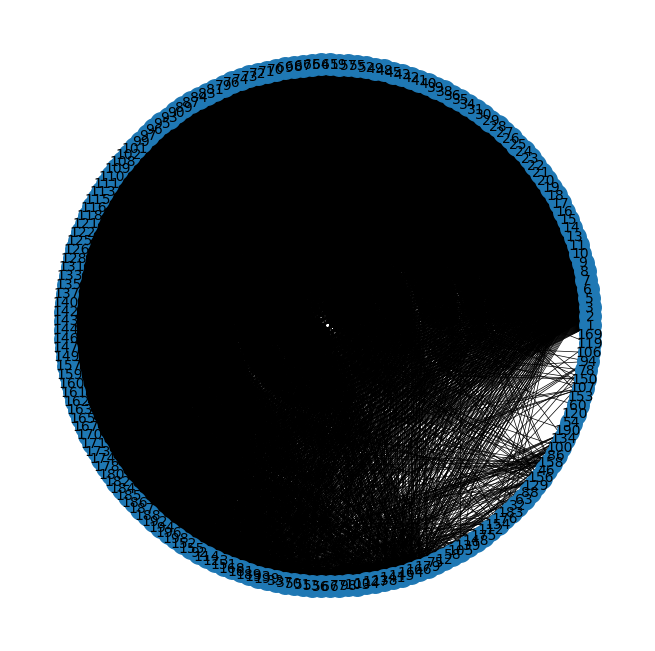

In [50]:
sax = plt.figure(figsize=(8.2, 8.2)).add_subplot(111)
nx.draw(
    G,
    pos=nx.circular_layout(G),
    with_labels=True,
    node_size=240,
    font_size=10,
    width=0.5,
    ax=sax
)

In [51]:
e_ids = []

try:
    #communities = nx.community.greedy_modularity_communities(G)
    communities = nx.community.louvain_communities(G)
except:
    communities = []
for idx, community in enumerate(communities):
    print(f"Community {idx}: {community}")
    for c in community:
        e_ids.append(c)
        print(f"{c:<4} {events[c].articles[0].lang} {events[c].articles[0].get_time()}  {events[c].articles[0].title}")

print("Non-community")
for i in range(len(events[:100])):
    if i not in e_ids:
        print(f"{i:<4} {events[i].articles[0].lang} {events[i].articles[0].get_time()}  {events[i].articles[0].title}")


Community 0: {1, 2, 3, 6, 8, 9, 10, 13, 15, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 34, 35, 36, 38, 40, 48, 49, 52, 55, 57, 59, 61, 64, 67, 68, 70, 73, 81, 87, 89, 90, 95, 96, 99, 101, 102, 106, 107, 108, 109, 111, 113, 115, 116, 121, 122, 125, 126, 131, 137, 140, 144, 146, 152, 155, 158, 159, 160, 163, 167, 169, 170, 171, 173, 174, 178, 180, 182, 184, 186, 188, 194, 198}
1    eng 2020-01-26 21:38:00  Kobe Bryant Dead at 41, Killed in Helicopter Crash
2    eng 2020-01-26 21:43:00  NBA Legend Kobe Bryant Killed in Helicopter Crash
3    eng 2020-01-26 21:48:00  Kobe Bryant killed in helicopter crash
6    por 2020-01-26 21:49:00  Kobe Bryant, um dos maiores jogadores da NBA, morre em queda de helicóptero
8    eng 2020-01-26 21:50:00  Kobe Bryant Killed In Helicopter Crash
9    spa 2020-01-26 21:50:00  Kobe Bryant muere en un accidente de helicóptero
10   eng 2020-01-26 21:51:00  Report: Kobe Bryant Has Died In A Helicopter Accident - ROCK 92.9 Rocks
13   eng 2020-01-26 21:55:0

# Measure the distances between the clusters

In [ ]:
centroids = torch.stack([event.centroid for event in events])

In [ ]:
dist_matrix = centroids.matmul(centroids.T)

In [ ]:
dist_matrix.shape

In [ ]:
s_idx = 0
e_idx = 10
print(dist_matrix[s_idx:e_idx, s_idx:e_idx].numpy())

# Dataset statistics

- Size and dimensionality of the dataset
- Data types
- Data distribution
- Class distribution
- Missing values
- Data quality

## Size and dimensionality of the dataset

The dataset contains 1,749,931 rows and 9 columns (the 10th is the ID of the cluster as labeled by Event Registry; this will be dropped).

In [ ]:
print("Size of the dataset", df.shape)

## Data Types

The columns of the data set are the following:

| column         | type         | description |
|----------------|--------------|-------------|
| id             | integer      | the ID of the article |
| title          | string       | the title of the article |
| body           | string       | the body of the article |
| concepts       | string[]     | the concepts of the article |
| time           | string       | the time of the article |
| lang           | string       | the language of the article |
| url            | string       | the URL of the article |
| source         | string       | the source of the article |
| wn_id          | string       | the cluster ID of the article |


For research purposes, the dataset will have to be modified as follows:

- The body must be omitted when the dataset is published to the general public.
- The body must not exceed the 15% of the original length of the article for scientific purposes.

In [ ]:
def get_attributes(df, attribute):
    return df[attribute]

In [ ]:
def word_count_stats(df, attribute, type="word"):
    def format_attr(attr):
        attr = f"{attr[:math.floor(len(attr) * 0.15)]}..." if attribute == "body" else attr
        return attr.split() if type == "word" else attr

    attr_vals = get_attributes(df, attribute)
    word_count = attr_vals.dropna().apply(lambda t: len(format_attr(t)))
    quartiles =  word_count.quantile([0.25, 0.5, 0.75])
    return {
        "mean": word_count.mean(),
        "std": word_count.std(),
        "quartile_25": quartiles[0.25],
        "quartile_50": quartiles[0.5],
        "quartile_75": quartiles[0.75],
    }

In [ ]:
def time_stats(df, attribute):
    attr_vals = get_attributes(df, attribute)
    return {
        "min": attr_vals.min().strftime('%Y-%m-%d'),
        "max": attr_vals.max().strftime('%Y-%m-%d'),
    }

In [ ]:
def cats_stats(df, attribute):
    attr_vals = get_attributes(df, attribute)
    return {
        "unique": len(attr_vals.unique()),
        "dist": attr_vals.dropna().value_counts().to_dict() if attribute != "wn_id" else None,
    }

In [ ]:
def get_df_attr_stats(df, attr):
    if attr == "title" or attr == "body":
        return {
            "attr": attr,
            "word_stats": word_count_stats(df, attr, type="word"),
            "char_stats": word_count_stats(df, attr, type="char"),
        }
    elif attr == "time":
        return {
            "attr": attr,
            "time_stats": time_stats(df, attr),
        }
    elif attr == "lang" or attr == "concepts" or attr == "wn_id":
        return {
            "attr": attr,
            "cat_stats": cats_stats(df, attr),
        }
    else:
        return {
            "attr": attr,
        }

In [ ]:
columns = ["title", "body", "time", "lang", "concepts", "wn_id"]

In [ ]:
for column in columns:
    print(get_df_attr_stats(df, column))

### Concept distribution

In [ ]:
u_concepts = df["concepts"].unique()

In [ ]:
for concept in u_concepts:
    c_df = df[df["concepts"] == concept]
    print("==========================================")
    print("CONCEPT", concept)
    print("------------------------------------------")
    print("Size of the dataset", c_df.shape)
    print("------------------------------------------")
    for column in columns:
        print(get_df_attr_stats(c_df, column))
    print("==========================================\n")